## Dynamics
\begin{align}
    y_t &= \sum_{m=1}^{M} \theta_{m} y_{t-m} + v_t \qquad \text{where} \ v_t \sim \mathcal{N}(0, f_t) \, . \\
    z_t &= \ z_{t-1} + w_t \qquad \qquad \text{where} \ w_t \sim \mathcal{N}(0, \gamma^{-1}) \label{up-rw} \\
    f_t &= \ \exp{(\kappa z_t + \omega)} \label{eq:hgf_pdmapping} \, .
\end{align}

## Probabilistic model
\begin{align}\label{gmodel}
  p&(\mathbf{y}, \mathbf{z}, \mathbf{x}, \boldsymbol{\Psi}) =  \underbrace{p(z_0) p(\boldsymbol{\Psi})}_{\text{priors}}  \prod_{t=1}^{T}\underbrace{p(y_t|\mathbf{x}_t, z_t, \boldsymbol{\Psi})}_{\text{observation}}\underbrace{p(z_t|z_{t-1}, \boldsymbol{\Psi})p(\mathbf{x}_t|\mathbf{x}_{t-1}, y_{t-1})}_{\text{state transition}} 
\end{align}
where $\boldsymbol{\Psi} = (\boldsymbol{\theta}, \gamma, \kappa, \omega)$, $\boldsymbol{\theta} \sim \mathcal{N}(\mathbf{m}_\theta, \mathbf{V}_\theta)$, $\gamma \sim \Gamma(\alpha, \beta)$, $\kappa \sim \mathcal{N}(m_\kappa, v_\kappa)$ and $\omega \sim  \mathcal{N}(m_\omega, v_\omega)$.

## FFG
![](ar-hgf.png)

In [13]:
include("DataAR.jl")
using .DataAR
using ForneyLab
using ProgressMeter
using Plots
using StatsPlots
using LaTeXStrings
using Random
using LinearAlgebra

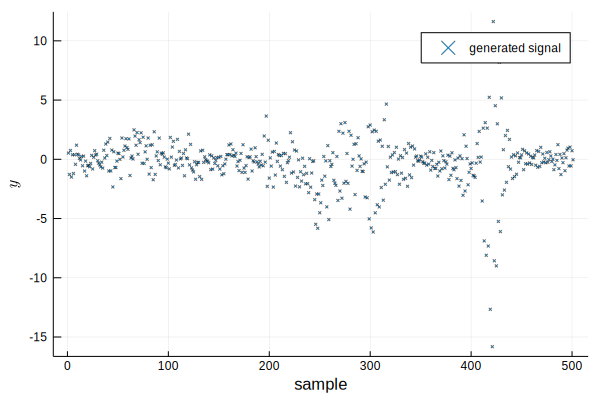

In [3]:
# Generate AR(2)-HGF
Random.seed!(69)
ARorder = 2
n_samples = 501
κ, ω, γ = 1, -2, 10
coefs, dataAR, tvar, rw = generateHGFAR(n_samples, ARorder, κ, ω, inv(γ))
observations = [y[1] for y in dataAR]
scatter(observations, xlabel="sample", markershape = :xcross, markersize = 0.5, markeralpha = 0.6, ylabel=L"y", label="generated signal")

In [4]:
# Build factor graph
g = FactorGraph()
@RV θ ~ GaussianMeanVariance(placeholder(:m_θ, dims=(ARorder, )), placeholder(:v_θ, dims=(ARorder, ARorder)))
@RV z_t_prev ~ GaussianMeanPrecision(placeholder(:m_z_t_prev), placeholder(:w_z_t_prev))
@RV w_z ~ Gamma(placeholder(:a_w), placeholder(:b_w))
@RV z_t ~ GaussianMeanPrecision(z_t_prev, w_z)
@RV s_t = dot(placeholder(:x_t_prev, dims=(ARorder, )), θ)
@RV ω_t_prev ~ GaussianMeanPrecision(placeholder(:m_ω_prev), placeholder(:w_ω_prev))
@RV ω_t ~ GaussianMeanPrecision(ω_t_prev, 500.0)
@RV κ_t_prev ~ GaussianMeanPrecision(placeholder(:m_κ_prev), placeholder(:w_κ_prev))
@RV κ_t ~ GaussianMeanPrecision(κ_t_prev, 500.0)
@RV x_t ~ GaussianControlledVariance(s_t, z_t, κ_t, ω_t)
@RV y_t ~ GaussianMeanVariance(x_t, tiny)
placeholder(y_t, :y_t)
ForneyLab.draw()

<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"
 "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">
<!-- Generated by graphviz version 2.40.1 (20161225.0304)
 -->
<!-- Title: G Pages: 1 -->
 
 
 G 
 
<!-- 13236056139166074298 -->
 
 13236056139166074298 
 
 clamp_2 
 
<!-- 927270560691487467 -->
 
 927270560691487467 
 
 placeholder_w_z_t_prev 
 
<!-- 13605444273243987892 -->
 
 13605444273243987892 
 
 clamp_3 
 
<!-- 14962603276115119556 -->
 
 14962603276115119556 
 
 𝒩 
 gaussianmeanprecision_1 
 
<!-- 14962603276115119556--927270560691487467 -->
 
 14962603276115119556--927270560691487467 
 
 w_z_t_prev 
 1 out 
 3 w 
 
<!-- 10834684105530773530 -->
 
 10834684105530773530 
 
 placeholder_m_z_t_prev 
 
<!-- 14962603276115119556--10834684105530773530 -->
 
 14962603276115119556--10834684105530773530 
 
 m_z_t_prev 
 1 out 
 2 m 
 
<!-- 10009325733157442232 -->
 
 10009325733157442232 
 
 placeholder_v_θ 
 
<!-- 9272981543576989329 -->
 
 9272981543576989329 
 
 placeholder_b_w 
 
<!-- 4115458631133826079 -->
 
 4115458631133826079 
 
 𝒩 
 gaussianmeanvariance_1 
 
<!-- 4115458631133826079--10009325733157442232 -->
 
 4115458631133826079--10009325733157442232 
 
 v_θ 
 1 out 
 3 v 
 
<!-- 4862800010606021496 -->
 
 4862800010606021496 
 
 placeholder_m_θ 
 
<!-- 4115458631133826079--4862800010606021496 -->
 
 4115458631133826079--4862800010606021496 
 
 m_θ 
 1 out 
 2 m 
 
<!-- 6711354251391561795 -->
 
 6711354251391561795 
 
 GCV 
 gaussiancontrolledvariance_1 
 
<!-- 10149993957230539682 -->
 
 10149993957230539682 
 
 𝒩 
 gaussianmeanprecision_2 
 
<!-- 6711354251391561795--10149993957230539682 -->
 
 6711354251391561795--10149993957230539682 
 
 z_t 
 1 out 
 3 z 
 
<!-- 14031617596671597098 -->
 
 14031617596671597098 
 
 𝒩 
 gaussianmeanprecision_4 
 
<!-- 6711354251391561795--14031617596671597098 -->
 
 6711354251391561795--14031617596671597098 
 
 ω_t 
 1 out 
 5 ω 
 
<!-- 5720021300614023249 -->
 
 5720021300614023249 
 
 𝒩 
 gaussianmeanprecision_6 
 
<!-- 6711354251391561795--5720021300614023249 -->
 
 6711354251391561795--5720021300614023249 
 
 κ_t 
 1 out 
 4 κ 
 
<!-- 2247354670692418 -->
 
 2247354670692418 
 
 dot 
 dotproduct_1 
 
<!-- 6711354251391561795--2247354670692418 -->
 
 6711354251391561795--2247354670692418 
 
 s_t 
 1 out 
 2 x 
 
<!-- 10149993957230539682--14962603276115119556 -->
 
 10149993957230539682--14962603276115119556 
 
 z_t_prev 
 1 out 
 2 m 
 
<!-- 9300850365208785000 -->
 
 9300850365208785000 
 
 Gam 
 gamma_1 
 
<!-- 10149993957230539682--9300850365208785000 -->
 
 10149993957230539682--9300850365208785000 
 
 w_z 
 1 out 
 3 w 
 
<!-- 17728891884803545474 -->
 
 17728891884803545474 
 
 placeholder_w_κ_prev 
 
<!-- 13109978192882640243 -->
 
 13109978192882640243 
 
 𝒩 
 gaussianmeanprecision_5 
 
<!-- 13109978192882640243--17728891884803545474 -->
 
 13109978192882640243--17728891884803545474 
 
 w_κ_prev 
 1 out 
 3 w 
 
<!-- 4809859769029504707 -->
 
 4809859769029504707 
 
 placeholder_m_κ_prev 
 
<!-- 13109978192882640243--4809859769029504707 -->
 
 13109978192882640243--4809859769029504707 
 
 m_κ_prev 
 1 out 
 2 m 
 
<!-- 2231145136703637172 -->
 
 2231145136703637172 
 
 𝒩 
 gaussianmeanprecision_3 
 
<!-- 14031617596671597098--2231145136703637172 -->
 
 14031617596671597098--2231145136703637172 
 
 ω_t_prev 
 1 out 
 2 m 
 
<!-- 3422820111867844695 -->
 
 3422820111867844695 
 
 clamp_1 
 
<!-- 14031617596671597098--3422820111867844695 -->
 
 14031617596671597098--3422820111867844695 
 
 clamp_1 
 1 out 
 3 w 
 
<!-- 9300850365208785000--9272981543576989329 -->
 
 9300850365208785000--9272981543576989329 
 
 b_w 
 1 out 
 3 b 
 
<!-- 10581570595088704659 -->
 
 10581570595088704659 
 
 placeholder_a_w 
 
<!-- 9300850365208785000--10581570595088704659 -->
 
 9300850365208785000--10581570595088704659 
 
 a_w 
 1 out 
 2 a 
 
<!-- 15596517348859778803 -->
 
 15596517348859778803 
 
 placeholder_m_ω_prev 
 
<!-- 8208

In [5]:
# Specify recognition distribution
q = RecognitionFactorization([s_t, x_t], [z_t, z_t_prev], [ω_t_prev, ω_t], [κ_t_prev, κ_t], w_z, ids=[:X_t :Z_t :Ω :Κ :Γz])

# Build free energy and inference algorithm
algoF = freeEnergyAlgorithm(q)
algo = variationalAlgorithm(q)

eval(Meta.parse(algo))
eval(Meta.parse(algoF))

freeEnergy (generic function with 1 method)

In [6]:
# Priors
mω_0, vω_0 = -1.0, 1.0
mz_0, vz_0 = 1.0, 10.0
mθ_0, vθ_0 = zeros(ARorder), 10*diageye(ARorder)
mκ_0, vκ_0 = 1.0, 1.0
a_w_0, b_w_0 = 0.0001, 0.0001

# Initial marginals q
marginals = Dict()
marginals[:x_t_s_t] = ProbabilityDistribution(Multivariate, GaussianMeanVariance, m=zeros(2),v=10*diageye(2))
marginals[:κ_t_κ_t_prev] = ProbabilityDistribution(Multivariate, GaussianMeanVariance, m=zeros(2), v=10*diageye(2))
marginals[:ω_t_ω_t_prev] = ProbabilityDistribution(Multivariate, GaussianMeanVariance, m=zeros(2), v=10*diageye(2))
marginals[:z_t] = ProbabilityDistribution(GaussianMeanVariance, m=mz_0, v=vz_0)
marginals[:z_t_prev] = ProbabilityDistribution(GaussianMeanVariance, m=mz_0, v=vz_0)
marginals[:ω_t] = ProbabilityDistribution(GaussianMeanVariance, m=mω_0, v=vω_0)
marginals[:w_z] = ProbabilityDistribution(Gamma, a=a_w_0, b=b_w_0)
marginals[:κ_t] = ProbabilityDistribution(GaussianMeanVariance, m=mκ_0, v=vκ_0)

# Number of VMP iterations
n_its = 10

# Data storage
buf_size = n_samples - 1 # we start to process data from the second sample; first is always observed
mω = Array{Float64}(undef, buf_size)
vω = Array{Float64}(undef, buf_size)
ms = Array{Float64}(undef, buf_size)
vs = Array{Float64}(undef, buf_size)
mz = Array{Float64}(undef, buf_size)
vz = Array{Float64}(undef, buf_size)
mθ = Vector{Vector{Float64}}(undef, buf_size)
vθ = Vector{Array{Float64, 2}}(undef, buf_size)
aw = Array{Float64}(undef, buf_size)
bw = Array{Float64}(undef, buf_size)
F = Array{Float64}(undef, buf_size, n_its)
mκ = Array{Float64}(undef, buf_size)
vκ = Array{Float64}(undef, buf_size)

# we make first prediction based on our priors
predictions = [[mθ_0'dataAR[1], sqrt(exp(mκ_0*mz_0 + mω_0))]]

1-element Array{Array{Float64,1},1}:
 [0.0, 1.0]

In [7]:
p = Progress(length(observations), 1, "Observed ")
for t in 2:n_samples
    update!(p, t)
    data = Dict(:y_t => observations[t],
                :m_z_t_prev => mz_0,
                :w_z_t_prev => inv(vz_0),
                :x_t_prev => dataAR[t-1],
                :m_θ => mθ_0,
                :v_θ => vθ_0,
                :m_ω_prev => mω_0,
                :w_ω_prev => inv(vω_0),
                :a_w => a_w_0,
                :b_w => b_w_0,
                :m_κ_prev => mκ_0,
                :w_κ_prev => inv(vκ_0))
    for i in 1:n_its
        stepZ_t!(data, marginals)
        stepΓz!(data, marginals)
        stepX_t!(data, marginals)
        stepΚ!(data, marginals)
        stepΩ!(data, marginals)
        F[t-1, i] = freeEnergy(data, marginals)
    end
    mω[t-1], vω[t-1] = ForneyLab.unsafeMeanCov(marginals[:ω_t])
    mz[t-1], vz[t-1] = ForneyLab.unsafeMeanCov(marginals[:z_t])
    mθ[t-1], vθ[t-1] = ForneyLab.unsafeMeanCov(marginals[:θ])
    aw[t-1], bw[t-1] = marginals[:w_z].params[:a], marginals[:w_z].params[:b]
    mκ[t-1], vκ[t-1] = ForneyLab.unsafeMeanCov(marginals[:κ_t])
    mz_0, vz_0 = mz[t-1], vz[t-1]
    mθ_0, vθ_0 = mθ[t-1], vθ[t-1]
    mω_0, vω_0 = mω[t-1], vω[t-1]
    mκ_0, vκ_0  = mκ[t-1], vκ[t-1]
    a_w_0, b_w_0 = aw[t-1], bw[t-1]
    ms[t-1], vs[t-1] = ForneyLab.unsafeMeanCov(marginals[:s_t])
    push!(predictions, [mθ_0'dataAR[t], sqrt(exp(mκ_0*mz_0 + mω_0))])
end

Observed 100%|██████████████████████████████████████████| Time: 0:00:18


In [8]:
# Extract time-varying variance
tmp = mκ.^2 .* vz .+ mz.^2 .* vκ .+ vz .* vκ
tvmean = exp.(mκ .* mz .+ mω)
tvvar = exp.(2 .* mκ .* mz .+ 2 .* tmp).* exp.(2 .* mω .+ 2 .*vω) - exp.(2 .* mκ .* mz .+tmp).* exp.(2 .*mω .+ vω)

500-element Array{Float64,1}:
 14.65602263154755    
  2.3197625633825387  
  0.8620915285438531  
  0.4232934222606921  
  0.2624034244524879  
  0.18314084650395374 
  0.13883734060635153 
  0.1455349757330209  
  0.15574770253329107 
  0.1442931318853466  
  0.12221472393074648 
  0.1046711980798471  
  0.09313508993645464 
  ⋮                   
  0.028004499848457126
  0.028239779326821257
  0.029163930768699914
  0.028242647238674007
  0.029465663155055083
  0.027367356935103365
  0.028291734913065303
  0.029482091338786598
  0.03169939629893945 
  0.03425144898985499 
  0.03685763471048886 
  0.0380194582570553  

## Plotting

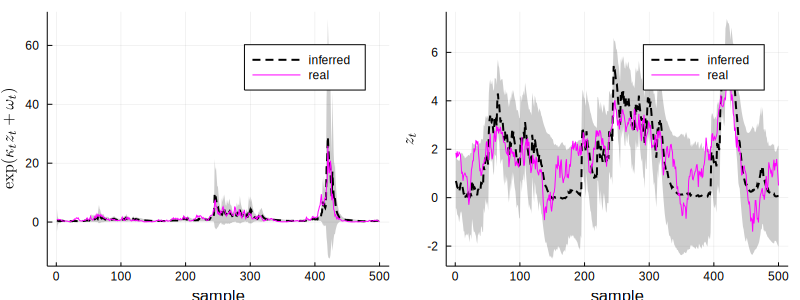

In [86]:
from, upto = 1, 500

plot(collect(from:upto), tvmean[from:upto], ribbon=sqrt.(tvvar[from:upto]), linestyle=:dash, linewidth = 2, color=:black, fillalpha = 0.2, fillcolor = :black, label=["inferred"])
ptvv = plot!(collect(from:upto), tvar[from:upto], color=:magenta, label="real", title="", ylabel=L"\exp(\kappa_t z_t + \omega_t)", xlabel="sample")

plot(collect(from:upto), mz[from:upto], ribbon=sqrt.(vz[from:upto]), linestyle=:dash, linewidth = 2, color=:black, fillalpha = 0.2, fillcolor = :black, label=["inferred"])
pzt = plot!(collect(from:upto), rw[from:upto], color=:magenta, label="real", title="", ylabel=L"z_t", xlabel="sample")

plot(ptvv, pzt, layout=(1,2),  size=(800, 300), legend=true, xlabel="sample")

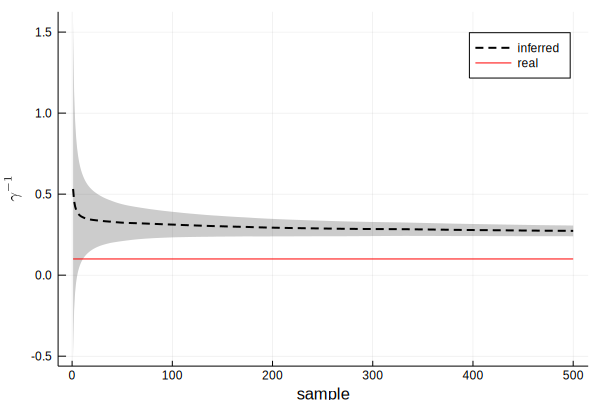

In [73]:
# variance upper layer 1/γ
plot(bw./aw, ribbon=sqrt.(bw./ aw.^2 ),
      linestyle=:dash, linewidth = 2,
      color=:black,
      fillalpha = 0.2,
      fillcolor = :black,
      label=["inferred"])
plot!(0.1*ones(length(aw)), color=:red, label="real", title="", xlabel="sample", ylabel=L"\gamma^{-1}")

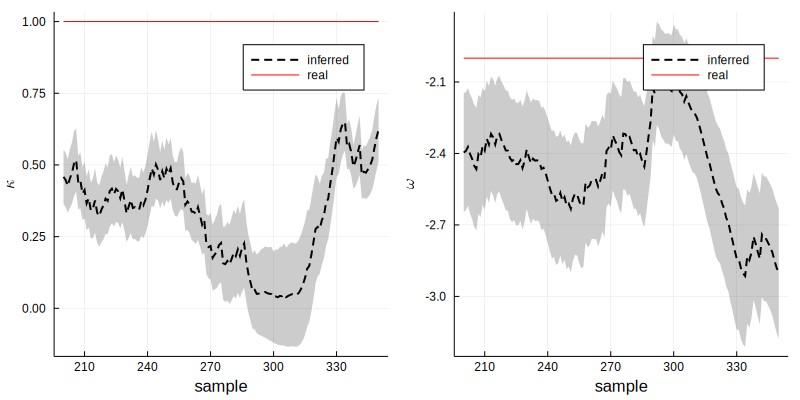

In [74]:
from, upto = 200, 350

# kappa
plot(collect(from:upto), mκ[from:upto], ribbon=sqrt.(vκ[from:upto]), linestyle=:dash, linewidth = 2, color=:black, fillalpha = 0.2, fillcolor = :black, label=["inferred"])
kplot = plot!(collect(from:upto), ones(length(mκ[from:upto])), color=:red, label="real", title="", ylabel=L"\kappa")

# omega
plot(collect(from:upto), mω[from:upto], ribbon=sqrt.(vω[from:upto]), linestyle=:dash, linewidth = 2, color=:black, fillalpha = 0.2, fillcolor = :black, label=["inferred"])
oplot = plot!(collect(from:upto), -2*ones(length(mκ[from:upto])), color=:red, label="real", title="", ylabel=L"\omega")

plot(kplot, oplot, layout=(1,2),  size=(800, 400), legend=true, xlabel="sample")

In [75]:
# Plotting countours (only for AR(2))
function plotθ(mθ, vθ, coefs, sample, prior)
    m_θ_0 = prior[1]
    v_θ_0 = prior[2]
    𝓝(x, μ, Σ) = 1/((2 * π)^(length(μ)/2) * det(Σ)^(1/2)) * exp(-(1/2) * (x-μ)' * Σ^(-1) * (x-μ));
    len=64
    plot()
    if coefs[1] < m_θ_0[1]
        xlims!(coefs[1] - 0.42, m_θ_0[1] + 0.42)
    else
        xlims!(m_θ_0[1] - 0.42, coefs[1] + 0.42)
    end
    if coefs[2] < m_θ_0[2]
        ylims!(coefs[2] - 0.42, m_θ_0[2] + 0.42)
    else
        ylims!(m_θ_0[2] - 0.42, coefs[2] + 0.42)
    end
    plot!([m_θ_0[1]],[m_θ_0[2]], seriestype=:scatter, title = "t=$(sample)", label="prior")
    plot!([coefs[1]],[coefs[2]], seriestype=:scatter, label="true")
    plot!([mθ[sample][1]],[mθ[sample][2]], seriestype=:scatter, label="posterior")
    # Posterior
    # get the maximum σ (used to construct the x and y ranges)
    σ_max = sqrt((vθ[sample][1] > vθ[sample][4]) ? vθ[sample][1] : vθ[sample][4])
    rx = range(mθ[sample][1]-3*σ_max, mθ[sample][1]+3*σ_max, length=len)
    ry = range(mθ[sample][2]-3*σ_max, mθ[sample][2]+3*σ_max, length=len)
    contour!(rx, ry, (x1, x2) -> 𝓝([x1 ; x2], mθ[sample], vθ[sample]), xlabel=L"\theta^{(1)}_1", ylabel=L"\theta^{(1)}_2")
    # prior
    σ_max_p = sqrt((v_θ_0[1] > v_θ_0[4]) ? v_θ_0[1] : v_θ_0[4])
    rx_p = range(m_θ_0[1]-3*σ_max, m_θ_0[1]+3*σ_max, length=len)
    ry_p = range(m_θ_0[2]-3*σ_max, m_θ_0[2]+3*σ_max, length=len)
    pθ1 = contour!(rx, ry, (x1, x2) -> 𝓝([x1 ; x2], m_θ_0, v_θ_0), xlabel=L"\theta^{(1)}_1", ylabel=L"\theta^{(1)}_2")
    return pθ1
end

plotθ (generic function with 1 method)

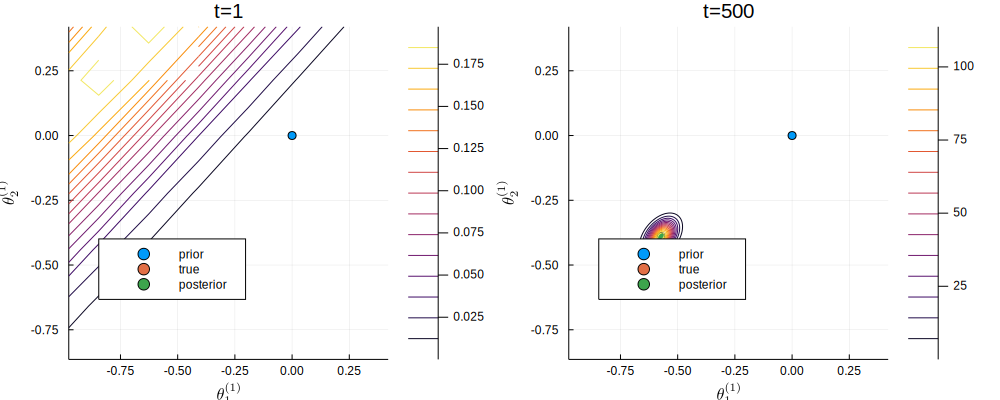

In [76]:
# AR coefs
ARorder = 2
pθtprev = plotθ(mθ, vθ, coefs, 1, [zeros(ARorder), 10*diageye(ARorder)])
pθt = plotθ(mθ, vθ, coefs, 500, [zeros(ARorder), 10*diageye(ARorder)])
plot(pθtprev, pθt, layout=(1,2),  size=(1000, 400), legend=:bottomleft)

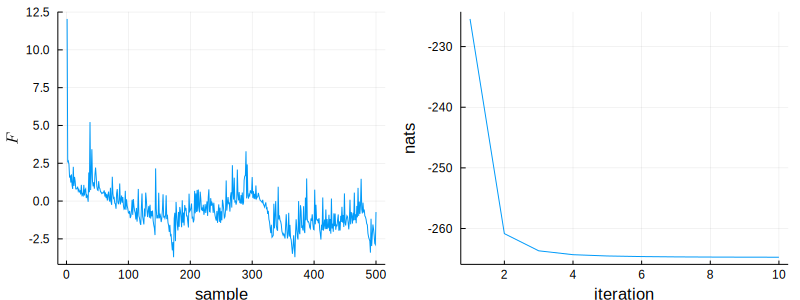

In [77]:
# free energy
fe = F[:,end]
fet = plot(fe, label="real", xlabel="sample", ylabel=L"F", legend=false)
fei = plot(sum(F,dims=1)', xlabel="iteration", ylabel="nats", legend=false)
plot(fet, fei, layout=(1,2),  size=(800, 300), legend=false)

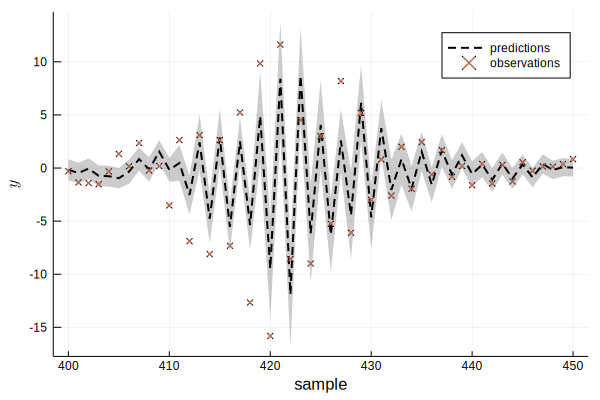

In [90]:
# predictions
from, upto = 400, 450
means = [x[1] for x in predictions]
vars = [x[2] for x in predictions]
plot(collect(from:upto), means[from:upto], ribbon=vars[from:upto], linestyle=:dash, linewidth = 2, color=:black, fillalpha = 0.2, fillcolor = :black, label=["predictions"])
scatter!(collect(from:upto), observations[from+1:upto+1], label="observations", markershape = :xcross, markersize = 2, ylabel=L"y", xlabel="sample")

## Animation

In [45]:
# Define functions for animation
function animate_states(means, vars, y, label; delta=1.0, toshow=10, option=:solid)
    if option == :solid
        ahead = toshow
    else
        ahead = 2*toshow
    end
    anim = @animate for i in 1:length(means)-ahead-1
        min = minimum(y[i:i+toshow]) <= minimum(means[i:i+toshow]) ? minimum(y[i:i+toshow]) : minimum(means[i:i+toshow])
        max = maximum(y[i:i+toshow]) >= maximum(means[i:i+toshow]) ? maximum(y[i:i+toshow]) : maximum(means[i:i+toshow])
        s = plot(xticks = i:div(toshow, 2):i+toshow, xlims=(i,i+1.5*toshow));
        ylims!(min - delta, max + delta);
        if option == :solid
            plot(collect(i:i+toshow), y[i:i+toshow], color=:magenta, xlabel="time T", ylabel=label, label="observation")
            fcolor = :black
        else
            scatter!(collect(i:i+toshow), y[i:i+toshow], xlabel="time T", ylabel=label, label="observation",
            markershape = :xcross, markeralpha = 0.9, markersize = 3)
            fcolor = :orange
        end
        plot!(collect(i:i+ahead), means[i:i+ahead], ribbon=sqrt.(vars[i:i+ahead]),
             linestyle=:dash, linewidth = 2,
             color=:black,
             fillalpha = 0.2,
             fillcolor = fcolor,
             label="predicted")
    end;
    return anim
end

function animate_params(means, vars, y, label; delta=.1)
   anim = @animate for i in 1:length(means)
        s = plot(y, label="real", ylabel=label, color=:magenta);
        min = minimum(y) <= minimum(means) ? minimum(y) : minimum(means)
        max = maximum(y) >= maximum(means) ? maximum(y) : maximum(means)
        ylims!(min - delta, max + delta);
        plot!(collect(1:i), means[1:i], ribbon=sqrt.(vars[1:i]),
             linestyle=:dash, linewidth = 2,
             color=:black,
             fillalpha = 0.2,
             fillcolor = :black,
             label="inferred")
   end;
   return anim
end

animate_params (generic function with 1 method)

In [22]:
# κ
animation = animate_params(mκ, vκ, κ*ones(length(mκ)), L"\kappa")
gif(animation, "gifs/kappa.gif", fps = 100)

┌ Info: Saved animation to 
│   fn = /Users/albertpod/Documents/Julia/L4DC-2020/gifs/kappa.gif
└ @ Plots /Users/albertpod/.julia/packages/Plots/Iuc9S/src/animation.jl:95


Plots.AnimatedGif("/Users/albertpod/Documents/Julia/L4DC-2020/gifs/kappa.gif")

In [23]:
# ω
animation = animate_params(mω, vω, ω*ones(length(mω)), L"\omega")
gif(animation, "gifs/omega.gif", fps = 100)

┌ Info: Saved animation to 
│   fn = /Users/albertpod/Documents/Julia/L4DC-2020/gifs/omega.gif
└ @ Plots /Users/albertpod/.julia/packages/Plots/Iuc9S/src/animation.jl:95


Plots.AnimatedGif("/Users/albertpod/Documents/Julia/L4DC-2020/gifs/omega.gif")

In [24]:
# γ
animation = animate_params(bw./aw, bw./ aw.^2, inv(γ)*ones(length(mκ)), L"\gamma^{-1}", delta=0.5)
gif(animation, "gifs/gamma.gif", fps = 100)

┌ Info: Saved animation to 
│   fn = /Users/albertpod/Documents/Julia/L4DC-2020/gifs/gamma.gif
└ @ Plots /Users/albertpod/.julia/packages/Plots/Iuc9S/src/animation.jl:95


Plots.AnimatedGif("/Users/albertpod/Documents/Julia/L4DC-2020/gifs/gamma.gif")

In [34]:
# time varying variance
animation = animate_states(tvmean, tvvar, tvar, L"\exp(\kappa_t z_t + \omega_t)", toshow=100)
gif(animation, "gifs/variance.gif", fps = 10)

┌ Info: Saved animation to 
│   fn = /Users/albertpod/Documents/Julia/L4DC-2020/gifs/variance.gif
└ @ Plots /Users/albertpod/.julia/packages/Plots/Iuc9S/src/animation.jl:95


Plots.AnimatedGif("/Users/albertpod/Documents/Julia/L4DC-2020/gifs/variance.gif")

In [35]:
# Random walk
animation = animate_states(mz, vz, rw, L"z_t", delta=1.0, toshow=100)
gif(animation, "gifs/rw.gif", fps = 10)

┌ Info: Saved animation to 
│   fn = /Users/albertpod/Documents/Julia/L4DC-2020/gifs/rw.gif
└ @ Plots /Users/albertpod/.julia/packages/Plots/Iuc9S/src/animation.jl:95


Plots.AnimatedGif("/Users/albertpod/Documents/Julia/L4DC-2020/gifs/rw.gif")

In [46]:
# Random walk
means = [x[1] for x in predictions]
vars = [x[2] for x in predictions]
animation = animate_states(means, vars, observations[2:end], L"y_t", toshow=10, option=:dashed)
gif(animation, "gifs/predictions.gif", fps = 10)

┌ Info: Saved animation to 
│   fn = /Users/albertpod/Documents/Julia/L4DC-2020/gifs/predictions.gif
└ @ Plots /Users/albertpod/.julia/packages/Plots/Iuc9S/src/animation.jl:95


Plots.AnimatedGif("/Users/albertpod/Documents/Julia/L4DC-2020/gifs/predictions.gif")